In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Separate the Features & Target variables

In [8]:
X = df.drop("sales", axis = 1)
y = df['sales']

---
---
## Finding the Best Polynomial Model


In [9]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []

# TEST ERROR PER DEGREE
test_rmse_errors = []

for degree in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "degree"
    polynomial_converter = PolynomialFeatures(degree = degree,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state = 42)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

#### Training Data RMSE

In [10]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838924,
 0.46887581118220845,
 0.36946897017715324,
 0.24382207592183858,
 0.198285650776807,
 0.26209694718219495,
 0.15511168640402317,
 0.17101914486004025]

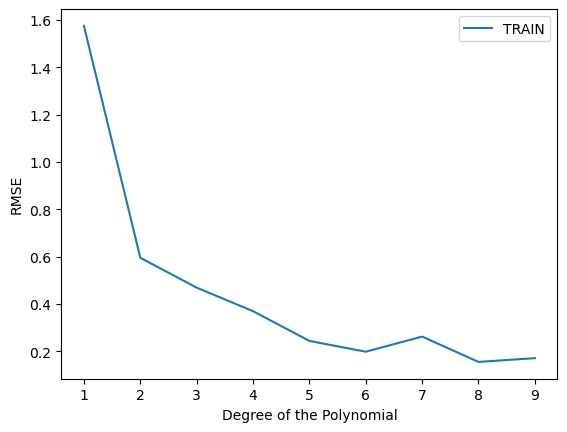

In [18]:
plt.plot(range(1,10),train_rmse_errors[:10],label='TRAIN')

plt.xlabel("Degree of the Polynomial")
plt.ylabel("RMSE")
plt.legend()

#### Test Data RMSE results

In [11]:
test_rmse_errors

[1.948537204344639,
 0.7233218473857522,
 0.5392350985654091,
 1.3032266090625522,
 5.946571962475899,
 26.495055688865804,
 638.2321998274979,
 2756.1068269338925,
 142221.21823006944]

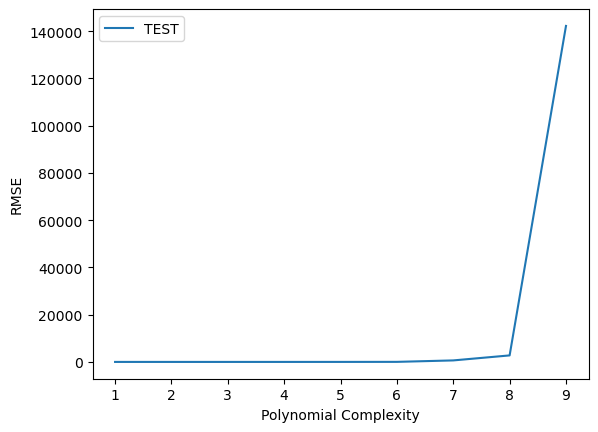

In [17]:
plt.plot(range(1,10),test_rmse_errors[:10],label='TEST')
plt.xlabel("Degree of the Polynomial")
plt.ylabel("RMSE")
plt.legend()

#### View the Training & Test data RMSE together

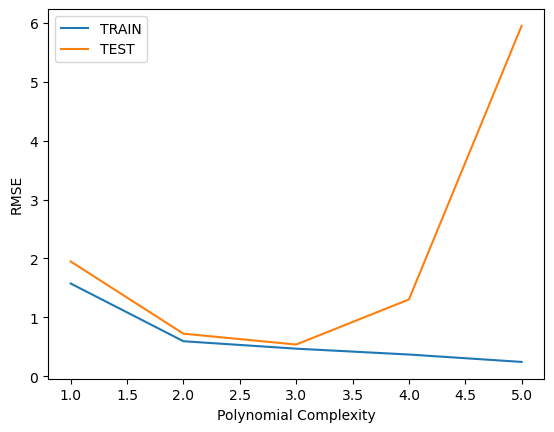

In [12]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Degree of the Polynomial")
plt.ylabel("RMSE")
plt.legend()

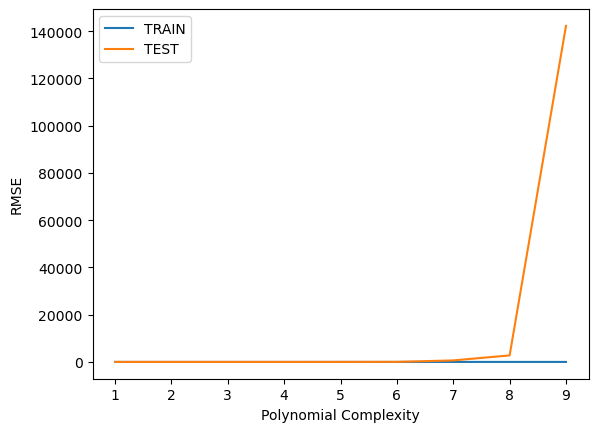

In [13]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Degree of the Polynomial")
plt.ylabel("RMSE")
plt.legend()

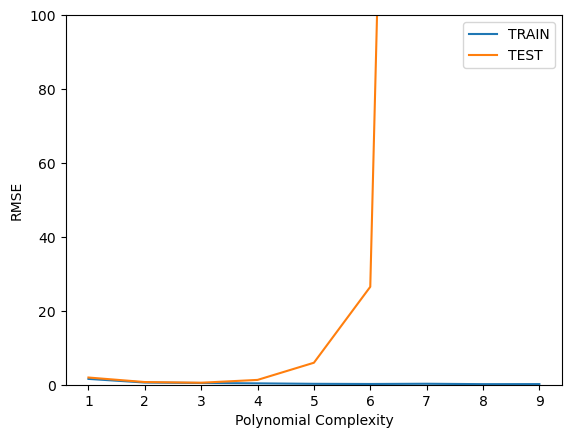

In [14]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Degree of the Polynomial")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

## Finalizing The Model Choice with Degree = 3


In [19]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [20]:
final_model = LinearRegression()

In [21]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

## Saving the Final Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. 

1. Save Polynomial Converter object
2. Save model

In [22]:
from joblib import dump, load

In [23]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [24]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [28]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [29]:
campaign = [[149,22,12]]

In [30]:
campaign_poly = loaded_poly.transform(campaign)

/Users/aayykayy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [31]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [32]:
final_model.predict(campaign_poly)

array([14.64501014])

-----
---